In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

class simple_plot :
    def __init__(self, df_obs,df_pred, xlabel = None, ylabel = None):
        self.df_obs = df_obs
        self.df_pred = df_pred
        self.obs = df_obs.values
        self.pred = df_pred.values
        self.xlabel = df_obs.name
        self.ylabel = df_pred.name
        self.ymin = min (np.amin(self.pred), np.amin(self.obs))
        self.ymax = max (np.amax(self.pred), np.amax(self.obs))
        self.yrange = self.ymax - self.ymin
        self.fig = None
        self.RMSE = None
        self.R2 = None
        self.label_message = None
        self.xlabel = self.df_obs.name
        self.ylabel = self.df_pred.name
        
    def update_range(self,df_obs, df_pred):
        if (self.ymax < np.amax(df_pred.values)):
            self.ymax = np.amax(df_pred.values)
            
        if (self.ymin > np.amin(df_pred.values)):
            self.ymin = np.amin(df_pred.values)
        self.yrange = self.ymax - self.ymin
    
    def report_max (self):
        return self.ymax
    def report_min (self):
        return self.ymin
    
    def calc_R2 (self):
        return r2_score(self.df_obs, self.df_pred)
    def calc_RMSE (self):
        return np.sqrt(mean_squared_error(self.df_obs, self.df_pred))

    def plot (self, energy_max, energy_min, xlabel, ylabel):
        self.fig = plt.figure(figsize=(8, 8))
        self.yrange = energy_max - energy_min
        xmin = energy_min - self.yrange * 0.01
        xmax = energy_max + self.yrange * 0.01
        ymin = energy_min- self.yrange * 0.01
        ymax = energy_max + self.yrange * 0.01
        plt.plot([xmin, xmax], 
                 [ymin, ymax])

        plt.xlim(xmin,xmax)

        plt.ylim(ymin,ymax)
        self.RMSE = self.calc_RMSE()
        self.R2 = self.calc_R2()
        self.label_message = ("RMSE : " + str (round(self.RMSE, 5))
                  +"\nR2      : "+ str(round(self.R2, 5)))
        
        plt.scatter(self.obs, self.pred, label=self.label_message)
        plt.legend(fontsize=12, loc='upper left')

        plt.xlabel(xlabel, fontsize=24)
        plt.ylabel(ylabel, fontsize=24)
        plt.title('Observed-Predicted Plot', fontsize=24)
        plt.tick_params(labelsize=16)
        plt.grid()
        self.fig.show()

# 3D-MoRSE (lowest, conformers)
filepath = "/Users/user/programs/result_dnn_conformers/eval_total_energy/eval_total_energy_hartree_conformers_0_2000epoch/observed_and_predicted.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_dnn_conformers/eval_total_energy/eval_total_energy_hartree_conformers_1_2000epoch/observed_and_predicted.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_dnn_conformers/eval_total_energy/eval_total_energy_hartree_conformers_2_2000epoch/observed_and_predicted.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)
obs_column_name = "observed_total_energy_hartree"
pred_column_name = "predicted_total_energy_hartree"
total_energy_loewest_plot_morse_c1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
total_energy_loewest_plot_morse_c2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
total_energy_loewest_plot_morse_c3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )

filepath = "/Users/user/programs/result_dnn_lowest/eval_total_energy/eval_total_energy_hartree_lowest_0_2000epoch/observed_and_predicted.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_dnn_lowest/eval_total_energy/eval_total_energy_hartree_lowest_1_2000epoch/observed_and_predicted.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_dnn_lowest/eval_total_energy/eval_total_energy_hartree_lowest_2_2000epoch/observed_and_predicted.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)
total_energy_loewest_plot_morse_l1  = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
total_energy_loewest_plot_morse_l2  = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
total_energy_loewest_plot_morse_l3  = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )


# GCNN (nfp, ggnn, weavenet)
obs_column_name = "t_total_energy_hartree"
pred_column_name = "y_pred_total_energy_hartree"
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_nfp_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_nfp_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_nfp_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)
total_energy_loewest_plot_nfp_l1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
total_energy_loewest_plot_nfp_l2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
total_energy_loewest_plot_nfp_l3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_ggnn_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_ggnn_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_ggnn_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)
total_energy_loewest_plot_ggnn_l1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
total_energy_loewest_plot_ggnn_l2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
total_energy_loewest_plot_ggnn_l3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_weavenet_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_weavenet_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_weavenet_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)
total_energy_loewest_plot_weavenet_l1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
total_energy_loewest_plot_weavenet_l2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
total_energy_loewest_plot_weavenet_l3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )


total_energy_max = max(total_energy_loewest_plot_morse_l1.report_max(),
                 total_energy_loewest_plot_morse_l2.report_max(),
                 total_energy_loewest_plot_morse_l3.report_max(),
                 total_energy_loewest_plot_morse_c1.report_max(),
                 total_energy_loewest_plot_morse_c2.report_max(),
                 total_energy_loewest_plot_morse_c3.report_max(),
                 total_energy_loewest_plot_nfp_l1.report_max(),
                 total_energy_loewest_plot_nfp_l2.report_max(),
                 total_energy_loewest_plot_nfp_l3.report_max(),
                 total_energy_loewest_plot_ggnn_l1.report_max(),
                 total_energy_loewest_plot_ggnn_l2.report_max(),
                 total_energy_loewest_plot_ggnn_l3.report_max(),
                 total_energy_loewest_plot_weavenet_l1.report_max(),
                 total_energy_loewest_plot_weavenet_l2.report_max(),
                 total_energy_loewest_plot_weavenet_l3.report_max())
total_energy_min = min(total_energy_loewest_plot_morse_l1.report_min(),
                 total_energy_loewest_plot_morse_l2.report_min(),
                 total_energy_loewest_plot_morse_l3.report_min(),
                 total_energy_loewest_plot_morse_c1.report_min(),
                 total_energy_loewest_plot_morse_c2.report_min(),
                 total_energy_loewest_plot_morse_c3.report_min(),
                 total_energy_loewest_plot_nfp_l1.report_min(),
                 total_energy_loewest_plot_nfp_l2.report_min(),
                 total_energy_loewest_plot_nfp_l3.report_min(),
                 total_energy_loewest_plot_ggnn_l1.report_min(),
                 total_energy_loewest_plot_ggnn_l2.report_min(),
                 total_energy_loewest_plot_ggnn_l3.report_min(),
                 total_energy_loewest_plot_weavenet_l1.report_min(),
                 total_energy_loewest_plot_weavenet_l2.report_min(),
                 total_energy_loewest_plot_weavenet_l3.report_min())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cann

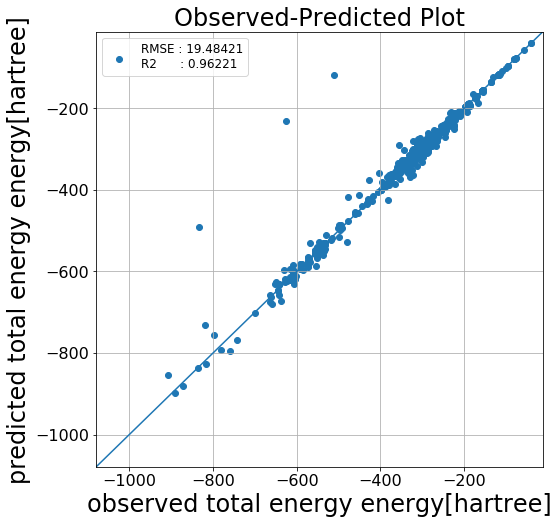

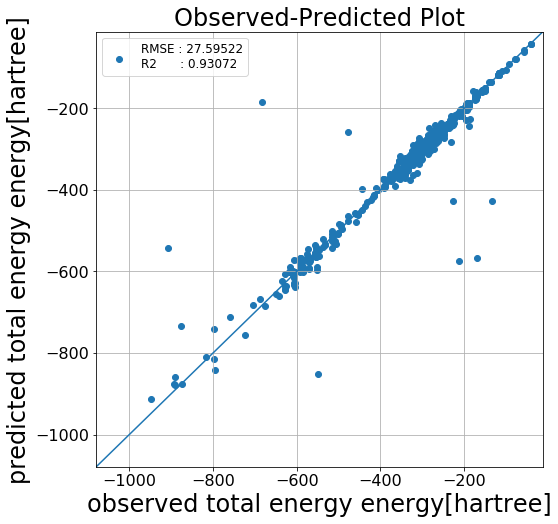

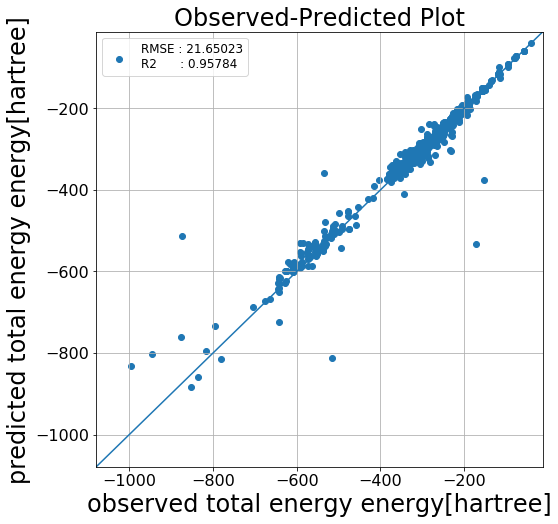

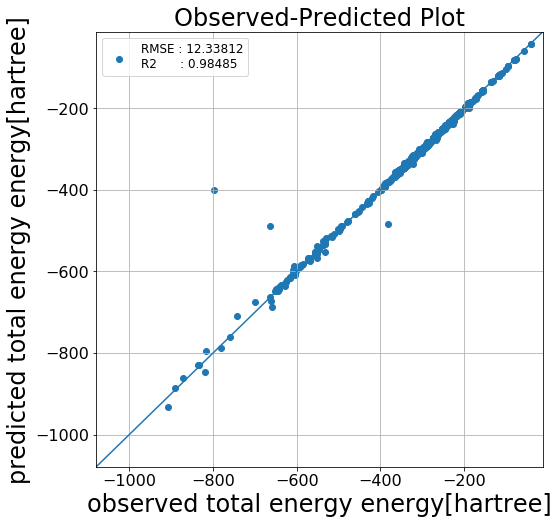

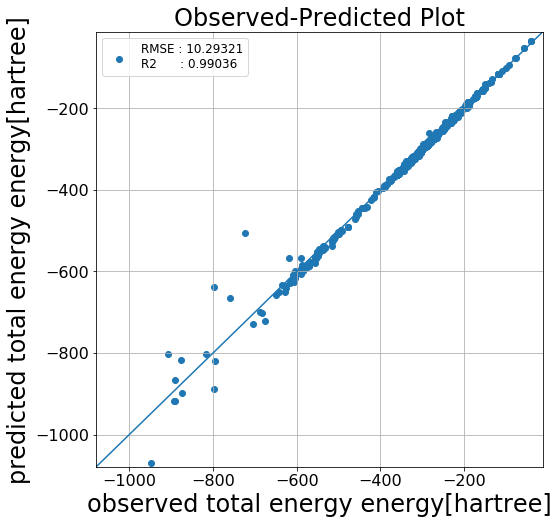

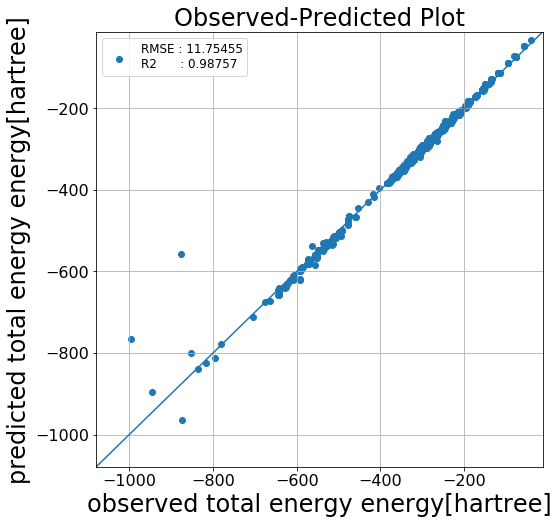

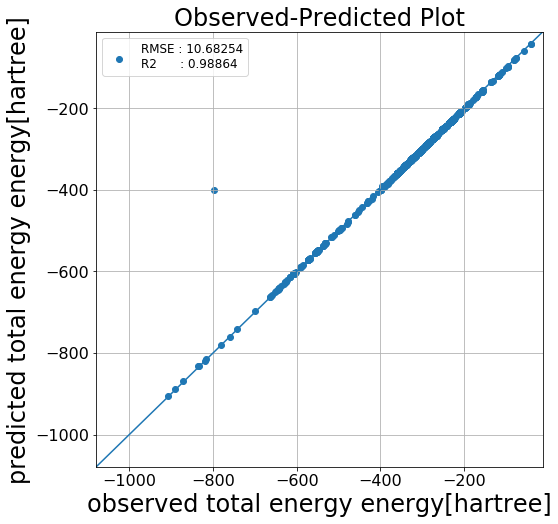

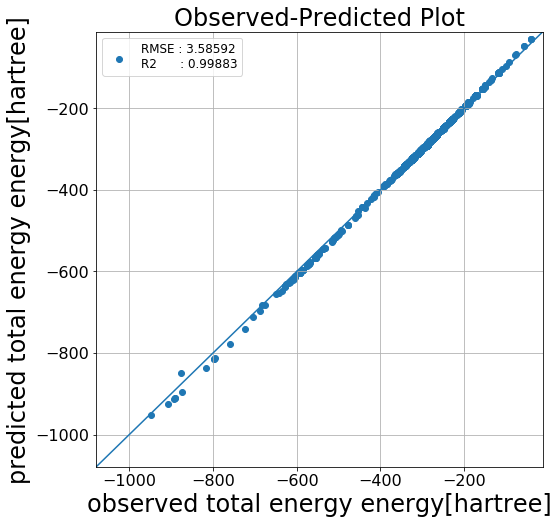

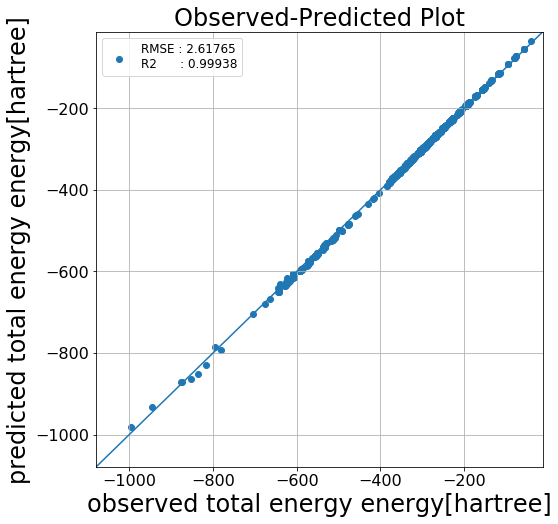

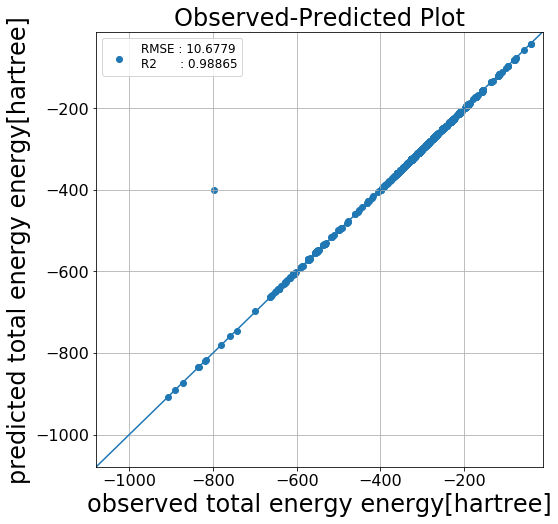

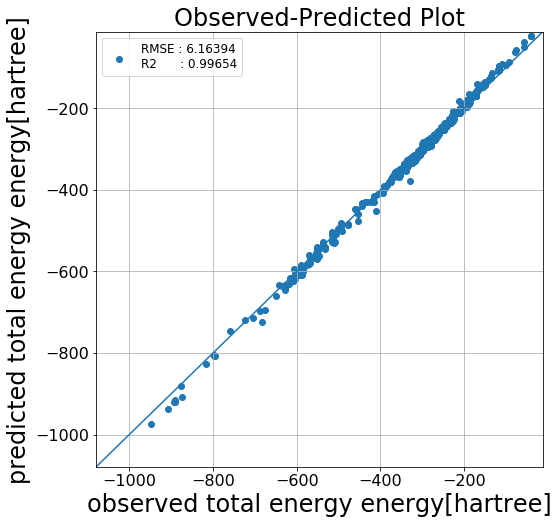

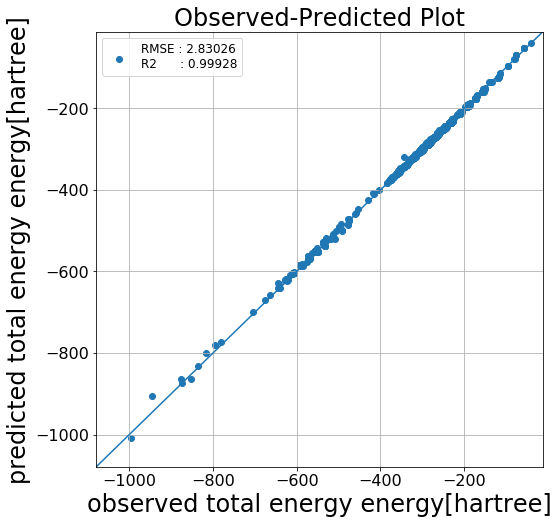

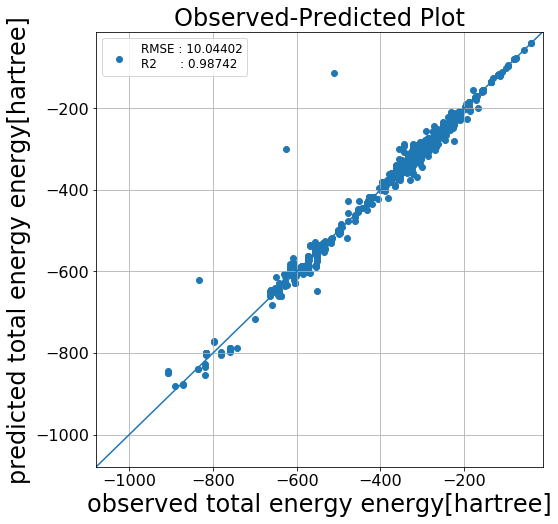

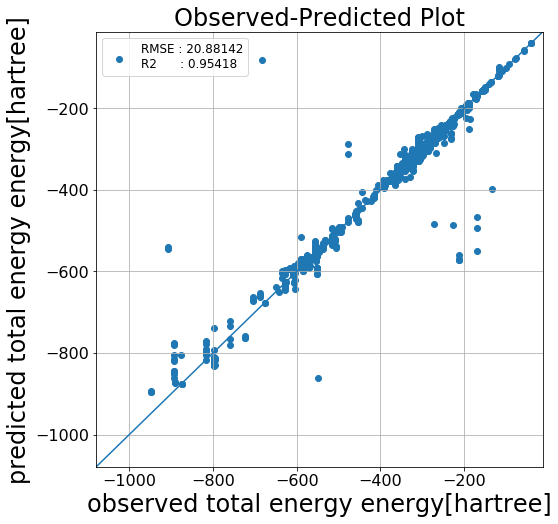

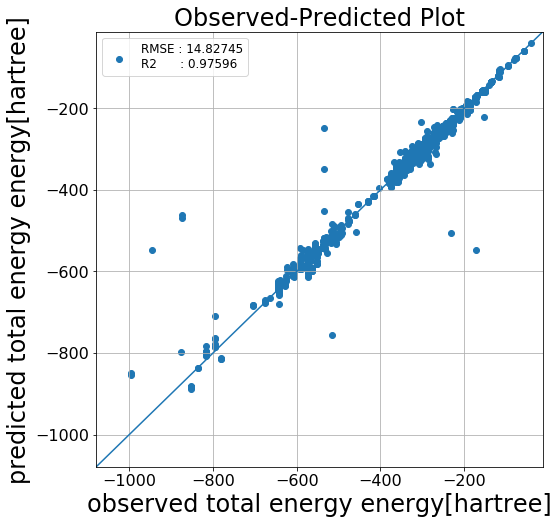

In [2]:
total_energy_loewest_plot_morse_l1.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_morse_l2.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_morse_l3.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_nfp_l1.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_nfp_l2.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_nfp_l3.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_ggnn_l1.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_ggnn_l2.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_ggnn_l3.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_weavenet_l1.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_weavenet_l2.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_weavenet_l3.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_morse_c1.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_morse_c2.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")
total_energy_loewest_plot_morse_c3.plot(total_energy_max, total_energy_min, "observed total energy energy[hartree]", "predicted total energy energy[hartree]")


In [3]:
R2_list = []
RMSE_list = []
RMSE_list.append(total_energy_loewest_plot_morse_l1.RMSE)
RMSE_list.append(total_energy_loewest_plot_morse_l2.RMSE)
RMSE_list.append(total_energy_loewest_plot_morse_l3.RMSE)

RMSE_list.append(total_energy_loewest_plot_nfp_l1.RMSE)
RMSE_list.append(total_energy_loewest_plot_nfp_l2.RMSE)
RMSE_list.append(total_energy_loewest_plot_nfp_l3.RMSE)
RMSE_list.append(total_energy_loewest_plot_ggnn_l1.RMSE)
RMSE_list.append(total_energy_loewest_plot_ggnn_l2.RMSE)
RMSE_list.append(total_energy_loewest_plot_ggnn_l3.RMSE)
RMSE_list.append(total_energy_loewest_plot_weavenet_l1.RMSE)
RMSE_list.append(total_energy_loewest_plot_weavenet_l2.RMSE)
RMSE_list.append(total_energy_loewest_plot_weavenet_l3.RMSE)

RMSE_list.append(total_energy_loewest_plot_morse_c1.RMSE)
RMSE_list.append(total_energy_loewest_plot_morse_c2.RMSE)
RMSE_list.append(total_energy_loewest_plot_morse_c3.RMSE)


R2_list.append(total_energy_loewest_plot_morse_l1.R2)
R2_list.append(total_energy_loewest_plot_morse_l2.R2)
R2_list.append(total_energy_loewest_plot_morse_l3.R2)

R2_list.append(total_energy_loewest_plot_nfp_l1.R2)
R2_list.append(total_energy_loewest_plot_nfp_l2.R2)
R2_list.append(total_energy_loewest_plot_nfp_l3.R2)
R2_list.append(total_energy_loewest_plot_ggnn_l1.R2)
R2_list.append(total_energy_loewest_plot_ggnn_l2.R2)
R2_list.append(total_energy_loewest_plot_ggnn_l3.R2)
R2_list.append(total_energy_loewest_plot_weavenet_l1.R2)
R2_list.append(total_energy_loewest_plot_weavenet_l2.R2)
R2_list.append(total_energy_loewest_plot_weavenet_l3.R2)

R2_list.append(total_energy_loewest_plot_morse_c1.R2)
R2_list.append(total_energy_loewest_plot_morse_c2.R2)
R2_list.append(total_energy_loewest_plot_morse_c3.R2)


s_RMSE = pd.DataFrame(RMSE_list)
s_R2 = pd.DataFrame(R2_list)

s_result = pd.concat([s_RMSE, s_R2], axis=1)
s_result.to_csv ("RMSE_R2_total_energy.csv", index=None, header = ["RMSE", "R2"])